<a href="https://colab.research.google.com/github/Tanvi1505/Thesparksfoundation-internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK1: PREDICTION USING SUPERVIDES MACHINE LEARNING.**

Question: Predict the percentage of an student based on the no.of study hours.


*   For this problem, we are going to use Linear Regression and some necessary python libraries such as pandas,numpy, scikitlearn and matplotlib.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score

2. Next step is to importing datasets given for this project.[http://bit.ly/w-data]

In [22]:
url = 'http://bit.ly/w-data'
ds = pd.read_csv(url)
print('The Dataset Imported Successfully')
ds.head(10)

The Dataset Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


3. Information about Data sets

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [21]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


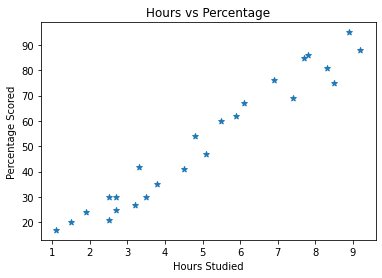

In [7]:
plt.scatter(ds['Hours'], ds['Scores'], marker='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

In [8]:
X = ds['Hours'].values
y = ds['Scores'].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20,), (5,), (20,), (5,))

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [12]:
reg.fit(X_train.reshape(-1, 1), y_train)
print('Training of the dataset has Completed')

Training of the dataset has Completed


4. Calculate the fit line.

In [13]:
L = reg.coef_*X + reg.intercept_

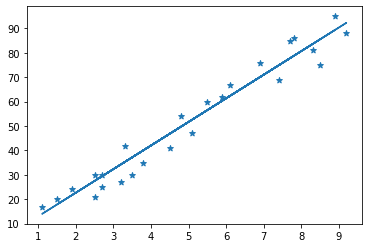

In [14]:
plt.scatter(ds['Hours'], ds['Scores'], marker='*')
plt.plot(X, L)
plt.show()

5. Making Predictions

In [15]:
y_pred = reg.predict(X_test.reshape(-1, 1))
y_pred

array([74.90959672, 70.0740592 , 46.86347911, 37.19240407, 62.33719917])

In [16]:
ds1 = pd.DataFrame(y_test, columns=['Testing Data'])
ds1


,Testing Data
0,69
1,76
2,41
3,30
4,67


In [17]:
# Comparing the predicted and actual values
ds1['Predicted Data'] = y_pred
ds1

,Testing Data,Predicted Data
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


In [18]:
def predict(hours):
    """
    Function to predict the Scores based on the Number of Hours
    hours -> Int
    return type -> Null
    """
    hours = np.array(hours)
    pred = reg.predict(hours.reshape(-1, 1))
    print(f'No. of Hours = {hours}')
    print(f'Predicted Percentage = {pred[0]}')

In [19]:
predict(9.25)


No. of Hours = 9.25
Predicted Percentage = 92.80108554200024


6. Evaluating the model.

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.910844306461269
